# Extraction de Keywords

## Imports

In [1]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [2]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [3]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

## Imports et stopwords

In [4]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaeld\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Stopwords (mis à jour itérativement)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "toute", "pendant", "moins", "dire", "cela", "non","grand"
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "TÉL", "tél", "téléph", "tel", "RUE", "rue",
       "BRUXELLES", "Bruxelles", "bruxelles", "Brux",
       "PRIX", "prix", "TRÈS", "très", "ANS", "ans", "MAISON", "maison", "APP", "app", "appart",
        "BON", "bon", "Ecrire", "Écrire", "ECR", "ecr", "écrire", "ECRIRE", "grand", "petit", "heures", "part",
        "mois", "place", "soir", "matin", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche",
        "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre",
        "octobre", "novembre", "décembre", "année", "Mme", "madame", "partir", "larg", "mètre",
        "pays", "PAYS", "libre", "Libre", "mod", "grande", "GRANDE", "cours", "conf",
        "LOUER", "louer", "VENDRE", "vendre", "LEURS", "leurs", "très", "jours", "demande", "vis",
        "peu", "chaque", "adr", "alors", "ceux", "déjà", "vend", "trop", "près", "vers", "frs",
        "francs", "mètres", "plusieurs", "rez", "culs", "chez", "conf", "agence", "etc"]
sw = set(sw)


In [6]:
## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [7]:
# Choisir une année
year = 1953

In [8]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [9]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [10]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [11]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [17]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [18]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1953_clean.txt!'

In [19]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SOBI SOLDES PARTOUT IRM SOLDES ANNEE DEPASSENTIEN MME PEÜTMGINER SSR MOUCHOIRS LAINE DEMI CHASSE GRS JJQ IWI TABLIERS DAME JEUNE FILLE JST UVI CHAPEAUX BLOUSES DAME JEUNE FILLE UVI PEIGNOIRS JEUNE FILLE ULVI SOUTIENS GORGE PULL OVERS JHWC ÎFO PEIGNOIRS DAME UÜV CULOTTES JAMBES SACS JUPES DAME JEUNE FILLE JKWR CHEMISES EMPIRE UUI GANTS SUÈDE XIST JVI ROBES DAME JEUNE FILLE UIV BAS NYLON JJQ TTVI CHAUSSURES VWI MANTEAUX DAME JEUNE FILLE COMBINAISONS OWB PARAPLUIES MANTEAUX FOURRURE DAME JEUNE FILL'

## Nuage de mots

In [20]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('ECRIRE', 514), ('BRUX', 474), ('BELGIQUE', 365), ('PRÉSIDENT', 360), ('BELGE', 330), ('ÉTAT', 325), ('FRANCE', 315), ('ANVERS', 314), ('VENTE', 309), ('TEMPS', 305)]


### Créer, stocker et afficher le nuage de mots

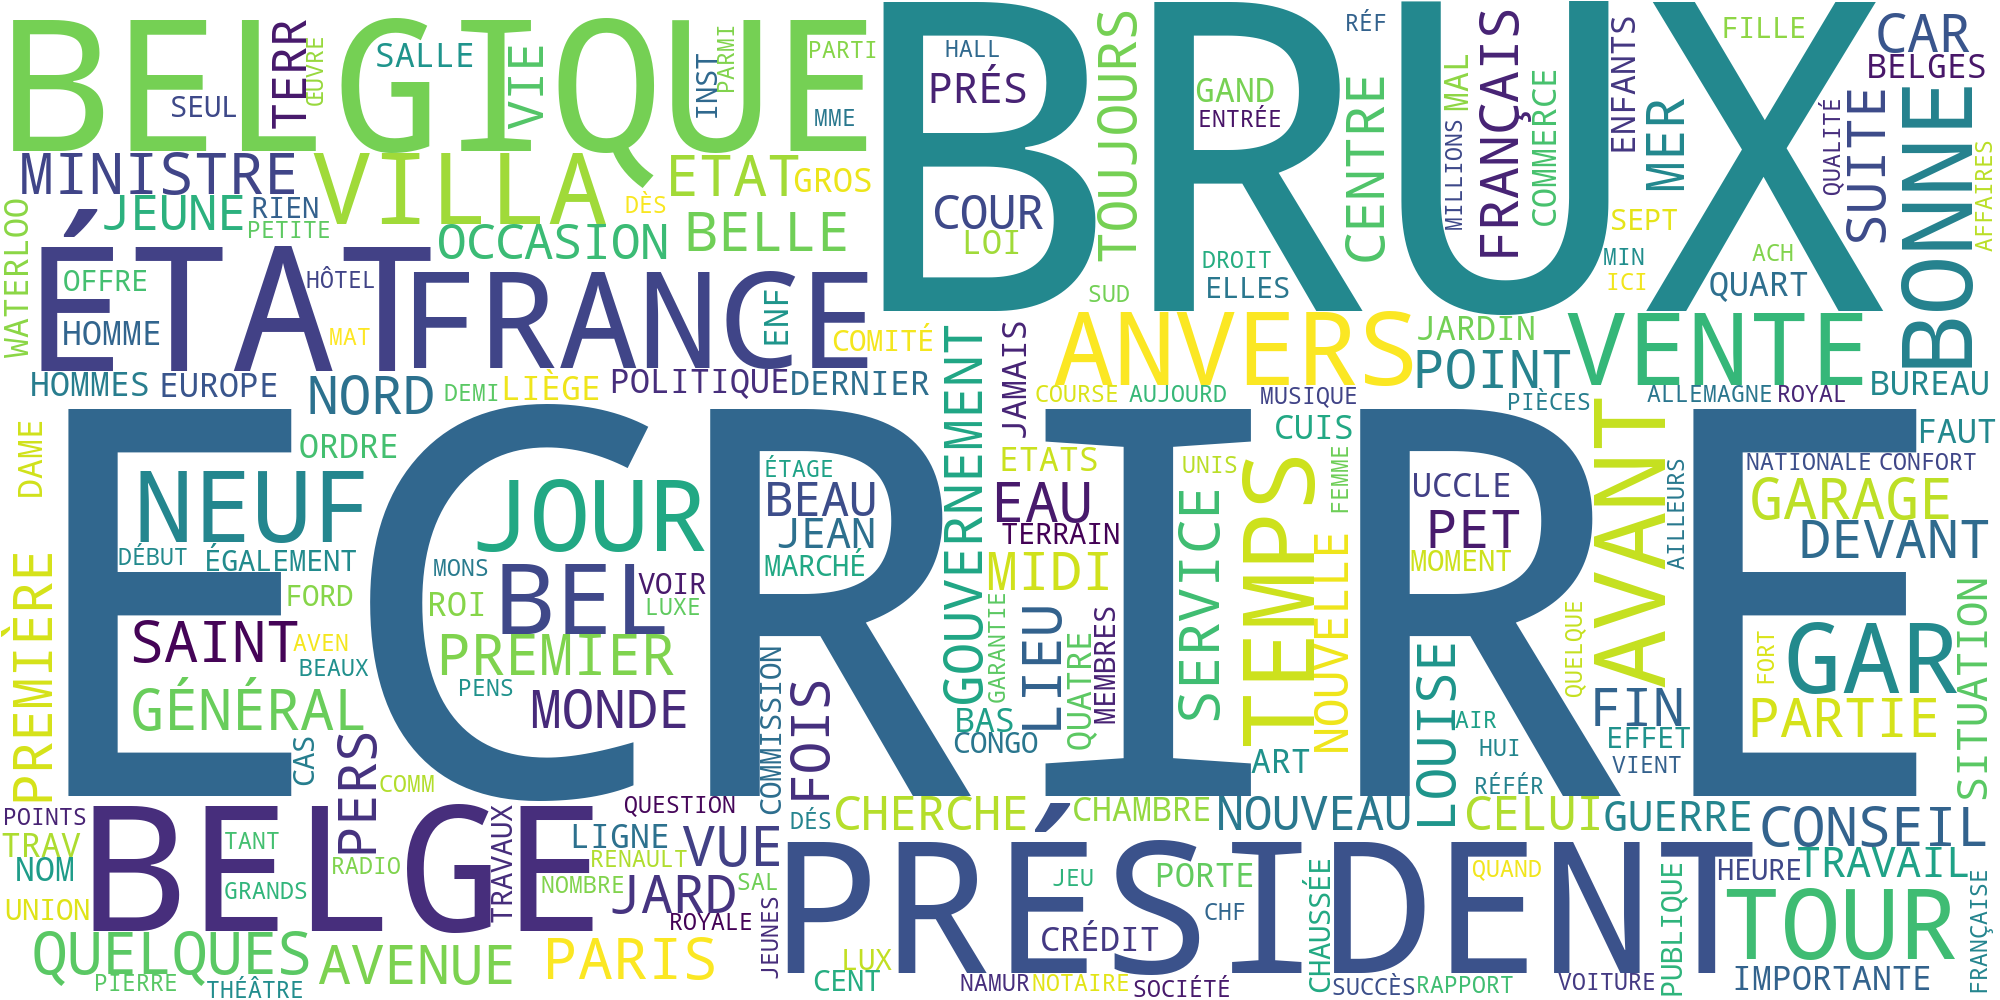

In [21]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

## Imports

In [22]:
# copie de s3_ner.ipynb du module 3
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [23]:
nlp = spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées sur les textes de 1953

In [24]:
# Charger le texte
n=100000
text = open("../data/tmp/1953.txt", encoding='utf-8').read()[:n]

In [25]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 4.17 s
Wall time: 4.26 s


In [26]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [27]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Rossel apparait 15 fois dans le corpus
Françoise Rosay apparait 5 fois dans le corpus
Verlaine apparait 5 fois dans le corpus
Anspach apparait 5 fois dans le corpus
Jacques Feyder apparait 4 fois dans le corpus
Mozart apparait 4 fois dans le corpus
M. Ryckmans apparait 3 fois dans le corpus
Ryckmans apparait 3 fois dans le corpus
Françoise apparait 3 fois dans le corpus
Clark Gable apparait 3 fois dans le corpus
Ecrire Ag apparait 3 fois dans le corpus
Joséphine-Charlotte apparait 2 fois dans le corpus
M. Rijckmans apparait 2 fois dans le corpus
O. N. U. apparait 2 fois dans le corpus
Roger Avermaete apparait 2 fois dans le corpus
Paul Achard apparait 2 fois dans le corpus
Calderon apparait 2 fois dans le corpus
Tamino apparait 2 fois dans le corpus
Ilya Ehrenbourg apparait 2 fois dans le corpus
Jésus La Caille apparait 2 fois dans le corpus
P. T. apparait 2 fois dans le corpus
J. Hoillday apparait 2 fois dans le corpus
Brand Whltlock apparait 2 fois dans le corpus
S. A. AUTO-OCCIDENTA

In [29]:
# Compter les entités
organis = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organis[ent.text] += 1

In [30]:
# Trier et imprimer

sorted_org = sorted(organis.items(), key=lambda kv: kv[1], reverse=True)

for org, freq in sorted_org[:50]:
    print(f"{org} apparait {freq} fois dans le corpus")

O.N.U. apparait 7 fois dans le corpus
Studebaker apparait 5 fois dans le corpus
Constitution apparait 4 fois dans le corpus
Conseil apparait 3 fois dans le corpus
Parlement apparait 3 fois dans le corpus
PF EA apparait 3 fois dans le corpus
CHAPEAUX apparait 2 fois dans le corpus
ministre des Colonies apparait 2 fois dans le corpus
Cercle royal africain apparait 2 fois dans le corpus
Commission apparait 2 fois dans le corpus
BELGIQUE apparait 2 fois dans le corpus
DTETEREN apparait 2 fois dans le corpus
DEMENAGEMENTS apparait 2 fois dans le corpus
PEUGEOT apparait 2 fois dans le corpus
^;\tv£ apparait 1 fois dans le corpus
LAINE apparait 1 fois dans le corpus
Iu9r CHEMISES apparait 1 fois dans le corpus
COMBINAISONS apparait 1 fois dans le corpus
CHEMISES apparait 1 fois dans le corpus
SLIPS apparait 1 fois dans le corpus
ROBES apparait 1 fois dans le corpus
YJAMAS apparait 1 fois dans le corpus
j&Hfî Fr apparait 1 fois dans le corpus
MOUSSELINE apparait 1 fois dans le corpus
TWEED app

In [31]:
# Compter les entités
lieux = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        lieux[ent.text] += 1

In [32]:
# Trier et imprimer

sorted_lieux = sorted(lieux.items(), key=lambda kv: kv[1], reverse=True)

for lieu, freq in sorted_lieux[:50]:
    print(f"{lieu} apparait {freq} fois dans le corpus")

Etat apparait 17 fois dans le corpus
Bruxelles apparait 17 fois dans le corpus
Belgique apparait 15 fois dans le corpus
Congo apparait 9 fois dans le corpus
Brux apparait 8 fois dans le corpus
Gand apparait 5 fois dans le corpus
France apparait 4 fois dans le corpus
Paris apparait 4 fois dans le corpus
état apparait 4 fois dans le corpus
Anvers apparait 3 fois dans le corpus
Ixelles apparait 3 fois dans le corpus
Territoire de l’ancienne commune de apparait 2 fois dans le corpus
de Belgique apparait 2 fois dans le corpus
Etats-Unis apparait 2 fois dans le corpus
Luxembourg apparait 2 fois dans le corpus
Angleterre apparait 2 fois dans le corpus
théâtre du Parc apparait 2 fois dans le corpus
Hollywood apparait 2 fois dans le corpus
Vienne apparait 2 fois dans le corpus
Brabant apparait 2 fois dans le corpus
Samedi apparait 2 fois dans le corpus
Uccle apparait 2 fois dans le corpus
rue de la Concorde apparait 2 fois dans le corpus
Panama apparait 2 fois dans le corpus
Mons apparait 2 foi

# Sentiment analysis avec Textblob-FR

## Imports

In [33]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

## Fonction

In [34]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Analyser le sentiment d'une phrase

In [35]:
get_sentiment("Malgré l'accueil favorable de Washington.; Une rencontre Eisenhower - Staline présente de sérieuses difficultés.")

This text is 32% positive and 0.375% subjective.


In [36]:
get_sentiment("M. Antonin Zapotocky, président du Conseil tchécoslovaque, a posé la première pierre do la statue géante de Staline sur le plateau de Letna qui domine Prague.")

This text is 27% positive and 0.3% subjective.


In [37]:
get_sentiment("Il semble invraisemblable que le président Eisenhower risque de mécontenter ses alliés en acceptant de voir Staline, seul.")

This text is 18% negative and 0.55% subjective.


In [38]:
get_sentiment("non seulement la France a été tenue à l’écart des conférences de Yalta et de Potsdam, mais elle ne devait pas, selon les vues soviétiques, participer aux autorités de contrôle en Allemagne. ")

This text is 15% negative and 0.06666666666666667% subjective.


In [39]:
get_sentiment("Cette ligne tend essentiellement à donner l’impression au monde extérieur qu’il y a quelque chose de changé à Moscou depuis l’avènement de Malenkov et qu'à la dictature de Staline a succédé une autorité « collective ». ")

This text is 5% positive and perfectly objective.


In [40]:
get_sentiment("Pièces bien vivantes, mais trop de pièces noires! ")

This text is 11% positive and 0.30000000000000004% subjective.


In [41]:
get_sentiment("Il nous a paru, parfois, que tel mouvement semblait contrarié sinon contraint par le décor.")

This text is neutral and perfectly objective.


In [42]:
get_sentiment("Cette visite était également en liaison avec l’organisation d'une exposition de produits de l'industrie belge qui doit avoir lieu prochainement au Mexique")

This text is 10% positive and 0.175% subjective.


In [43]:
get_sentiment("On ne manquera pas de trouver étrange qu'une question qui ne pouvait être traitée que sur le pian national et dans la pleine lumière, soit ainsi tenue dans l’ombre et entourée d'un black-out aussi absolu.")

This text is 4% negative and 0.13999999999999999% subjective.


In [44]:
get_sentiment("On découvrira avec intérêt cette peinture sensible et un peu appliquée. ")

This text is 18% positive and 0.26875000000000004% subjective.
